In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [2]:
da = xr.open_dataset('mod-4-hw-all-lon.nc')
da

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 2GB ...
    tcwv        (valid_time, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

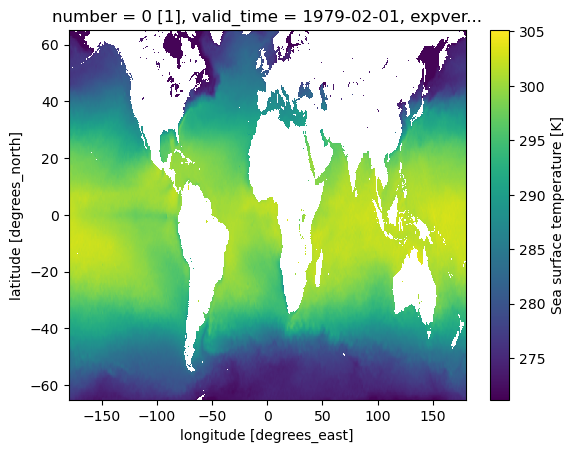

In [3]:
da['sst'][1,:,:].plot()

In [4]:
da['longitude']

<xarray.DataArray 'longitude' (longitude: 1440)> Size: 12kB
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75],
      shape=(1440,))
Coordinates:
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number     int64 8B ...
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [5]:
ds = da.copy()
ds

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 2GB ...
    tcwv        (valid_time, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds2 = ds.sel(longitude = slice(120,180))
ds2

<xarray.Dataset> Size: 552MB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 240)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 2kB 120.0 120.2 120.5 ... 179.2 179.5 179.8
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 276MB ...
    tcwv        (valid_time, latitude, longitude) float32 276MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds3 = ds.sel(longitude = slice(-180,-120))
ds3

<xarray.Dataset> Size: 554MB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 241)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 2kB -180.0 -179.8 -179.5 ... -120.2 -120.0
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 277MB ...
    tcwv        (valid_time, latitude, longitude) float32 277MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
ds_combined = xr.concat([ds2,ds3], dim = 'longitude')
ds_combined

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... -120.2 -120.0
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB nan ... 273.3
    tcwv        (valid_time, latitude, longitude) float32 553MB 1.102 ... 7.369
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
lons = ds_combined.longitude.values
lons = [(360+i) if i <0 else i for i in lons ]
lons

[np.float64(120.0),
 np.float64(120.25),
 np.float64(120.5),
 np.float64(120.75),
 np.float64(121.0),
 np.float64(121.25),
 np.float64(121.5),
 np.float64(121.75),
 np.float64(122.0),
 np.float64(122.25),
 np.float64(122.5),
 np.float64(122.75),
 np.float64(123.0),
 np.float64(123.25),
 np.float64(123.5),
 np.float64(123.75),
 np.float64(124.0),
 np.float64(124.25),
 np.float64(124.5),
 np.float64(124.75),
 np.float64(125.0),
 np.float64(125.25),
 np.float64(125.5),
 np.float64(125.75),
 np.float64(126.0),
 np.float64(126.25),
 np.float64(126.5),
 np.float64(126.75),
 np.float64(127.0),
 np.float64(127.25),
 np.float64(127.5),
 np.float64(127.75),
 np.float64(128.0),
 np.float64(128.25),
 np.float64(128.5),
 np.float64(128.75),
 np.float64(129.0),
 np.float64(129.25),
 np.float64(129.5),
 np.float64(129.75),
 np.float64(130.0),
 np.float64(130.25),
 np.float64(130.5),
 np.float64(130.75),
 np.float64(131.0),
 np.float64(131.25),
 np.float64(131.5),
 np.float64(131.75),
 np.float64(132.

In [10]:
lons = np.array(lons)
ds_combined = ds_combined.assign_coords(longitude=lons)
ds_combined

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB nan ... 273.3
    tcwv        (valid_time, latitude, longitude) float32 553MB 1.102 ... 7.369
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

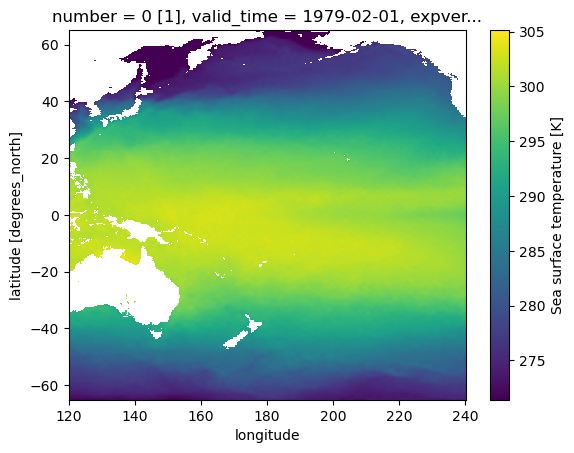

In [11]:
ds_combined['sst'][1,:,:].plot()

In [12]:
ds_combined.to_netcdf('sst_pacific')

In [13]:
sst_anom = ds_combined['sst'] - ds_combined['sst'].mean('valid_time')
sst_anom

<xarray.DataArray 'sst' (valid_time: 552, latitude: 521, longitude: 481)> Size: 553MB
array([[[        nan,         nan,         nan, ..., -3.7384949 ,
         -3.7384949 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.9267273 ,  0.92840576,  0.92904663, ...,  0.7051697 ,
          0.7168579 ,  0.7284546 ],
        [ 0.18545532,  0.20620728,  0.2260437 , ...,  0.60491943,
          0.6061096 ,  0.6086426 ],
        [-0.18353271, -0.17495728, -0.18026733, ...,  0.5305176 ,
          0.52319336,  0.5203552 ]],

       [[        nan,         nan,         nan, ..., -3.7384949 ,
         -3.7384949 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.5666809 , -0.57476807, -0.58291626, ..., -0.624176  ,
         -0.61053467, -0.5979614 ],
        [-0.45248413, -0.4600525 , -0.4675598 , ..., -0.8699341 ,
         -0.8765564 , -0.8847656 ],
        [-0.29901123, -0.30508423, -0.30941772, ..., -1.1181641 ,
         -1.1098633 , -1.1107483 ]],

       [[        nan,         nan,         nan, ..., -3.7380066 ,
         -3.7380066 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.410614  ,  0.3937378 ,  0.37680054, ...,  0.11679077,
          0.12457275,  0.13031006],
        [ 0.42227173,  0.41177368,  0.40133667, ...,  0.18255615,
          0.13980103,  0.09643555],
        [ 0.2144165 ,  0.22299194,  0.250885  , ...,  0.0456543 ,
          0.00805664, -0.03286743]]], shape=(552, 521, 481), dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0001'

In [14]:
ds_combined['sst_anom'] = sst_anom
ds_combined

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB nan ... 273.3
    tcwv        (valid_time, latitude, longitude) float32 553MB 1.102 ... 7.369
    sst_anom    (valid_time, latitude, longitude) float32 553MB nan ... -0.03287
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [15]:
tcwv_anom = ds_combined['tcwv'] - ds_combined['tcwv'].mean('valid_time')

In [16]:
ds_combined['tcwv_anom'] = tcwv_anom
ds_combined

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B 0
    expver      (valid_time) <U4 9kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB nan ... 273.3
    tcwv        (valid_time, latitude, longitude) float32 553MB 1.102 ... 7.369
    sst_anom    (valid_time, latitude, longitude) float32 553MB nan ... -0.03287
    tcwv_anom   (valid_time, latitude, longitude) float32 553MB -6.937 ... 0....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
ds_combined.to_netcdf('sst_pacific_anoms_correct')


In [18]:
new_data = xr.open_dataset('sst_pacific_anoms_correct')
new_data

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB ...
    tcwv        (valid_time, latitude, longitude) float32 553MB ...
    sst_anom    (valid_time, latitude, longitude) float32 553MB ...
    tcwv_anom   (valid_time, latitude, longitude) float32 553MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
stzd_sst = new_data['sst_anom']/(new_data['sst_anom'].std())
stzd_tcwv = new_data['tcwv_anom']/(new_data['tcwv_anom'].std())

In [20]:
new_data['stzd_sst'] = stzd_sst
new_data['stzd_tcwv'] = stzd_tcwv
new_data

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB ...
    tcwv        (valid_time, latitude, longitude) float32 553MB ...
    sst_anom    (valid_time, latitude, longitude) float32 553MB nan ... -0.03287
    tcwv_anom   (valid_time, latitude, longitude) float32 553MB -6.937 ... 0....
    stzd_sst    (valid_time, latitude, longitude) float32 553MB nan ... -0.01505
    stzd_tcwv   (valid_time, latitude, longitude) float32 553MB -1.096 ... 0....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [21]:
test_data = new_data.drop_vars(('expver', 'number'))
test_data

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 552, latitude: 521, longitude: 481)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
Data variables:
    sst         (valid_time, latitude, longitude) float32 553MB ...
    tcwv        (valid_time, latitude, longitude) float32 553MB ...
    sst_anom    (valid_time, latitude, longitude) float32 553MB nan ... -0.03287
    tcwv_anom   (valid_time, latitude, longitude) float32 553MB -6.937 ... 0....
    stzd_sst    (valid_time, latitude, longitude) float32 553MB nan ... -0.01505
    stzd_tcwv   (valid_time, latitude, longitude) float32 553MB -1.096 ... 0....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T02:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [22]:

coslat = np.cos(np.deg2rad(test_data['sst_anom'].coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(test_data['sst_anom'], weights=wgts)

In [23]:
eof1 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2, pcscaling=1)

/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'EOF1 expressed as correlation')

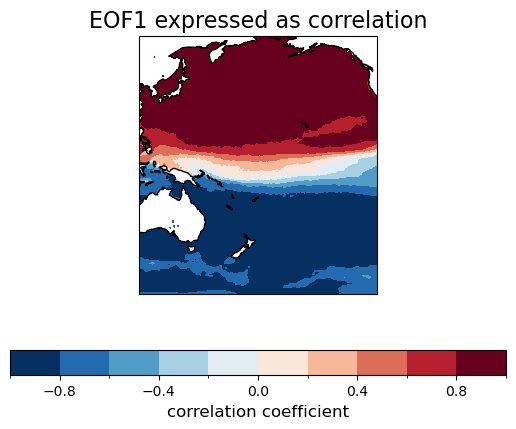

In [24]:
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'EOF 1-5 expressed as correlation')

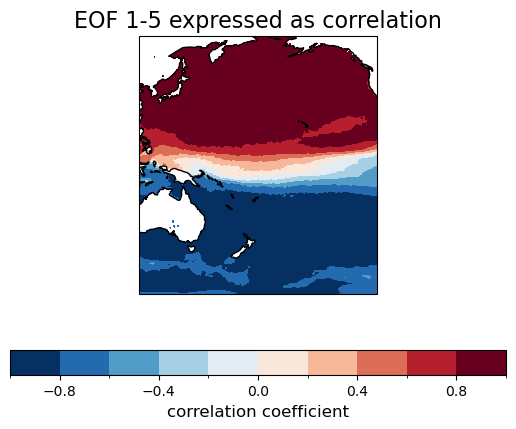

In [25]:
eof5 = solver.eofsAsCorrelation(neofs=6)

clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof5[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF 1-5 expressed as correlation', fontsize=16)

In [26]:
varfrac = solver.varianceFraction()

(7.48532332851045e-16, 0.8689971566200256)

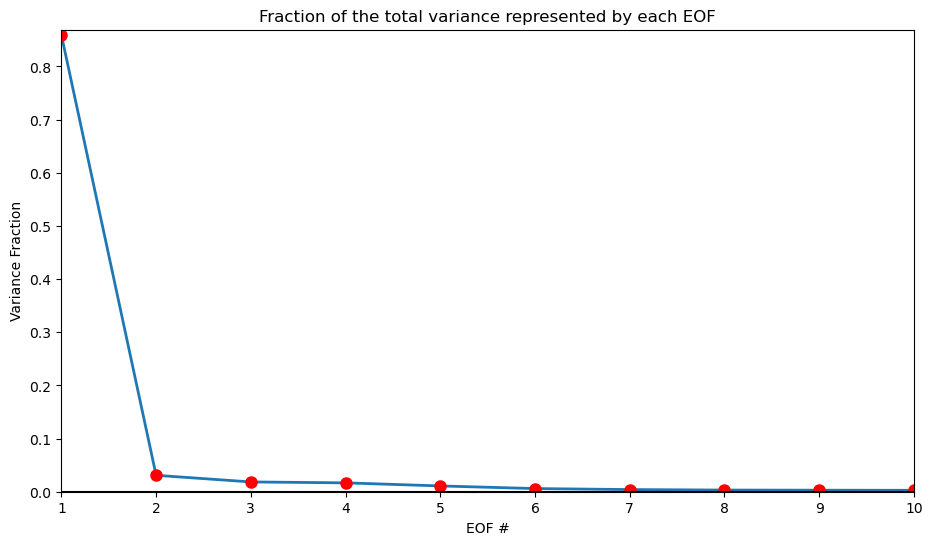

In [27]:
# Plot the fraction of variance explained by each EOF
plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 11))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 10)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

In [28]:
reconstruction = solver.reconstructedField(5)
reconstruction

<xarray.DataArray 'sst_anom' (valid_time: 552, latitude: 521, longitude: 481)> Size: 553MB
array([[[        nan,         nan,         nan, ..., -2.7781746 ,
         -2.7781746 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 1.0311226 ,  1.036126  ,  1.040756  , ...,  1.2460784 ,
          1.2433258 ,  1.2406791 ],
        [ 0.8488759 ,  0.8564541 ,  0.86370146, ...,  1.2203143 ,
          1.2213596 ,  1.2223902 ],
        [ 0.5841982 ,  0.59073186,  0.59568983, ...,  1.2040209 ,
          1.2064116 ,  1.2080184 ]],

       [[        nan,         nan,         nan, ..., -2.3234255 ,
         -2.3234255 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.5475155 , -0.5421996 , -0.5365456 , ..., -1.8082783 ,
         -1.8283708 , -1.8484449 ],
        [-0.4438885 , -0.44272497, -0.4413188 , ..., -1.7298985 ,
         -1.7535353 , -1.7770077 ],
        [-0.28373694, -0.2838077 , -0.28493494, ..., -1.6294551 ,
         -1.6481754 , -1.6691701 ]],

       [[        nan,         nan,         nan, ..., -3.7420745 ,
         -3.7420745 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.28209788,  0.2933901 ,  0.30478352, ..., -0.95333344,
         -0.9815785 , -1.0096813 ],
        [ 0.24328785,  0.25237474,  0.26145154, ..., -0.8587563 ,
         -0.8894192 , -0.9198756 ],
        [ 0.22260594,  0.2298546 ,  0.23505384, ..., -0.7209275 ,
         -0.7410432 , -0.76628584]]], shape=(552, 521, 481), dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2024-12-01
  * latitude    (latitude) float64 4kB 65.0 64.75 64.5 ... -64.5 -64.75 -65.0
  * longitude   (longitude) float64 4kB 120.0 120.2 120.5 ... 239.5 239.8 240.0
Attributes:
    long_name:  sst_anom_reconstructed_with_5_EOFs

/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


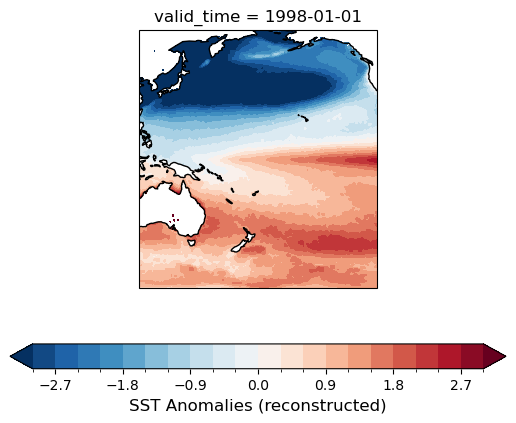

In [29]:
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = reconstruction.sel(valid_time='1998-01-15', method='nearest').plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies (reconstructed)', fontsize=12)

/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


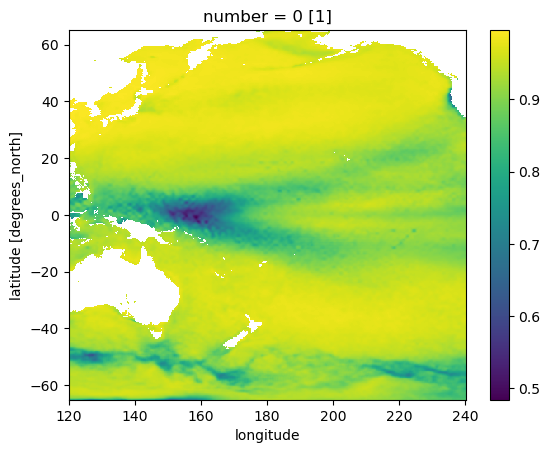

In [30]:
correlation = xr.corr(new_data['sst'], reconstruction, dim="valid_time")
correlation.plot()

/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/geoaxes.py:1631: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)
/opt/conda/envs/xarray-climate-mod-4/lib/python3.14/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


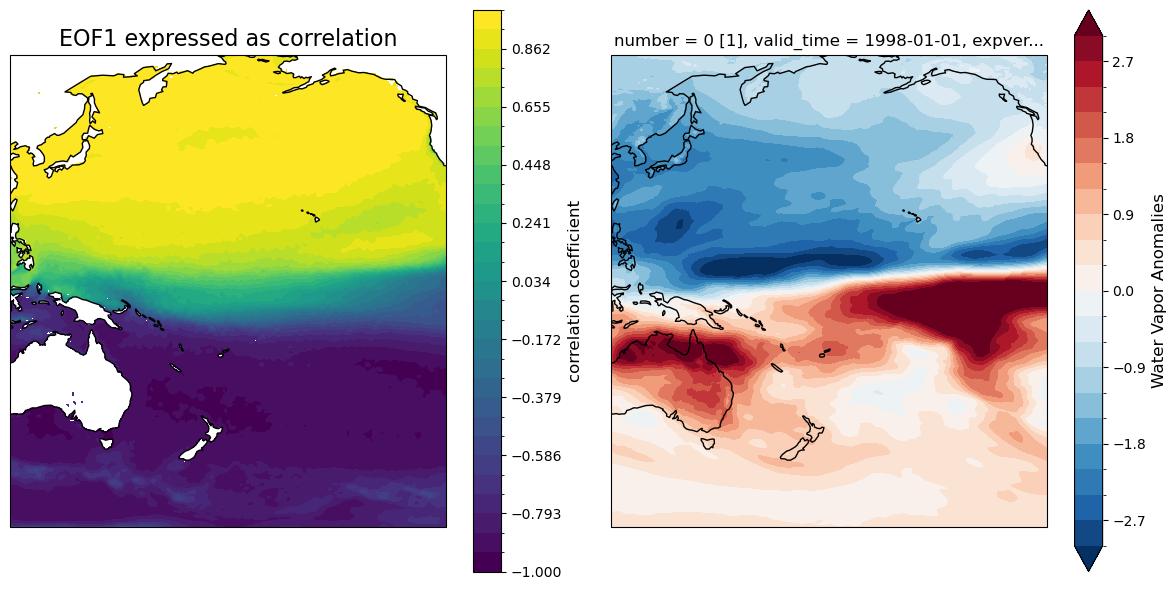

In [38]:
proj = ccrs.PlateCarree(central_longitude=190)
fig, axs = plt.subplots(1,2, figsize = (12,6), subplot_kw = dict(projection=proj))
clevs = np.linspace(-1, 1, 30)
fill = eof1[0].plot.contourf(ax=axs[0], levels=clevs, cmap=plt.cm.viridis,
                             add_colorbar=False, transform=ccrs.PlateCarree())
axs[0].add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='vertical')
cb.set_label('correlation coefficient', fontsize=12)
axs[0].set_title('EOF1 expressed as correlation', fontsize=16)

clevs1 = np.linspace(-3, 3, 21)
wv_fill = new_data['stzd_tcwv'].sel(valid_time='1998-01-15', method='nearest').plot.contourf(ax=axs[1], 
                             levels=clevs1, cmap=plt.cm.RdBu_r, add_colorbar=False, 
                             transform=ccrs.PlateCarree(), shrink = 0.6)
axs[1].add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb1 = plt.colorbar(wv_fill, orientation='vertical')
cb1.set_label('Water Vapor Anomalies', fontsize=12)


plt.tight_layout()


